In [3]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# read csv file and store as data frame in memory
df = pd.read_csv("diamonds.csv")

# Data analysis and preprocessing

In [4]:
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")

The dataset has 53940 rows and 10 columns.


In [5]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
# some info about the numerical data (mean, max, min etc.)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
# rename columns
df = df.rename(columns={
    'depth': 'total_depth_percentage',
    'x': 'length',
    'y': 'width',
    'z': 'depth'
})
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'total_depth_percentage', 'table',
       'price', 'length', 'width', 'depth'],
      dtype='object')

In [10]:
# show duplicates based on all columns
df[df.duplicated(keep=False)]

,carat,cut,color,clarity,total_depth_percentage,table,price,length,width,depth
1004,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50078,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [11]:
# remove duplicates
df = df.drop_duplicates()

In [12]:
# count rows with missing values
rows_with_missing_values = df.isna().any(axis=1).sum()
print(rows_with_missing_values)

0


In [13]:
df.shape

(53794, 10)

# Visualization

In [14]:
import matplotlib.pylab as plt

# select stylesheet for matplotlib
plt.style.use("ggplot")
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

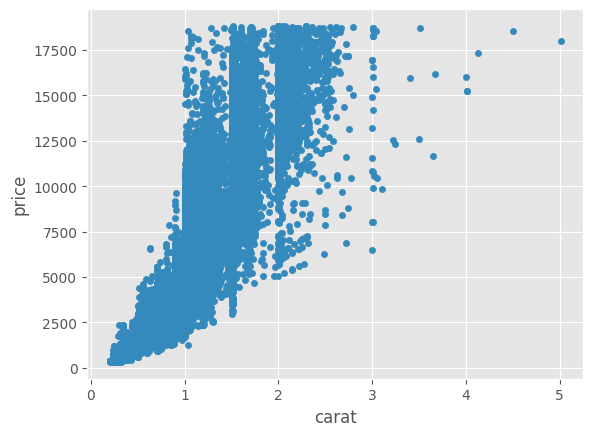

In [15]:
df.plot(kind='scatter', x='carat', y='price')
plt.show()

# Linear Regression with one variable

Linear Model predicting the price of the diamond based on weight in carat.

In [17]:
# split data into features
X = df[['carat']].values
y = df[['price']].values

In [18]:
# split the data frame into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [19]:
# create and a linear model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# calculate R2-score
y_test_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.8474417546449654


# Prepare data for linear regression with multiple variables and polynomial regression 

In [30]:
# drop 'unwanted' columns
df_filtered_for_size = df[['price', 'length', 'width', 'depth']]
df_filtered_for_size.head()

,price,length,width,depth
0,326,3.95,3.98,2.43
1,326,3.89,3.84,2.31
2,327,4.05,4.07,2.31
3,334,4.20,4.23,2.63
4,335,4.34,4.35,2.75


In [31]:
# split data into features
X = df_filtered_for_size.drop(labels=['price'], axis=1).values
y = df_filtered_for_size[['price']].values

In [32]:
# split the data frame into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Linear model with multiple independent variables

Predict price based on the length, width and depth.

In [33]:
# create and a linear model based on multiple independent variables
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_test_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.7829533832374016


# Polynomial regression with length, width and depth

In [35]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

In [36]:
# transform training data 
X_train_transformed = pf.fit_transform(X_train)
X_test_transformed = pf.fit_transform(X_test)

In [37]:
model_polynomial = LinearRegression()
model_polynomial.fit(X_train_transformed, y_train)

LinearRegression()

In [38]:
r2 = model_polynomial.score(X_test_transformed, y_test)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.862172289990632
